<a href="https://colab.research.google.com/github/YashWasnik7/2022Spring_Finals/blob/main/PR_final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Creating monthly COVID-19 cases plot for India and USA

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/PR_finals/worldometer_coronavirus_daily_data.csv")

In [ ]:
# take out india and us rows
cases_india = data[data['country']=='India'][['date','country','cumulative_total_cases','daily_new_cases']]
cases_usa = data[data['country']=='USA'][['date','country','cumulative_total_cases','daily_new_cases']]

In [ ]:
# create month and year columns
cases_india['month'] = pd.DatetimeIndex(cases_india['date']).month
cases_india['year'] = pd.DatetimeIndex(cases_india['date']).year

cases_usa['month'] = pd.DatetimeIndex(cases_usa['date']).month
cases_usa['year'] = pd.DatetimeIndex(cases_usa['date']).year

In [ ]:
cases_india = cases_india.reset_index()
cases_usa = cases_usa.reset_index()

In [ ]:
cases_india.drop('index', axis=1, inplace=True)
cases_usa.drop('index', axis=1, inplace=True)

cases_india.drop('cumulative_total_cases', axis=1, inplace=True)
cases_usa.drop('cumulative_total_cases', axis=1, inplace=True)

In [ ]:
# group dataframes by month and year

cases_india_monthwise = cases_india.groupby(['month','year']).sum().reset_index()

cases_usa_monthwise = cases_usa.groupby(['month','year']).sum().reset_index()

In [ ]:
# combine month and year into index of dataframe

cases_india_monthwise['month_year'] =  cases_india_monthwise['year'].apply(str) + '-' + cases_india_monthwise['month'].apply(str)

cases_usa_monthwise['month_year'] =  cases_usa_monthwise['year'].apply(str) + '-' + cases_usa_monthwise['month'].apply(str)


In [ ]:
# sort rows in ascending order of year and month

cases_india_monthwise.sort_values(by=['year', 'month'], ascending = True, inplace = True)

cases_usa_monthwise.sort_values(by=['year', 'month'], ascending = True, inplace = True)

In [ ]:
# merge the india and usa dataframes into one
covid_cases = pd.merge(left = cases_india_monthwise, right = cases_usa_monthwise, 
                       how = 'inner', left_on = 'month_year', right_on = 'month_year')

In [ ]:
# rename columns and drop duplicate columns

covid_cases = covid_cases.rename(columns = {'daily_new_cases_x':'cases_india', 'daily_new_cases_y':'cases_usa',})
covid_cases.drop(['month_y', 'year_y'], axis=1, inplace=True)

Text(0, 0.5, 'no. of cases')

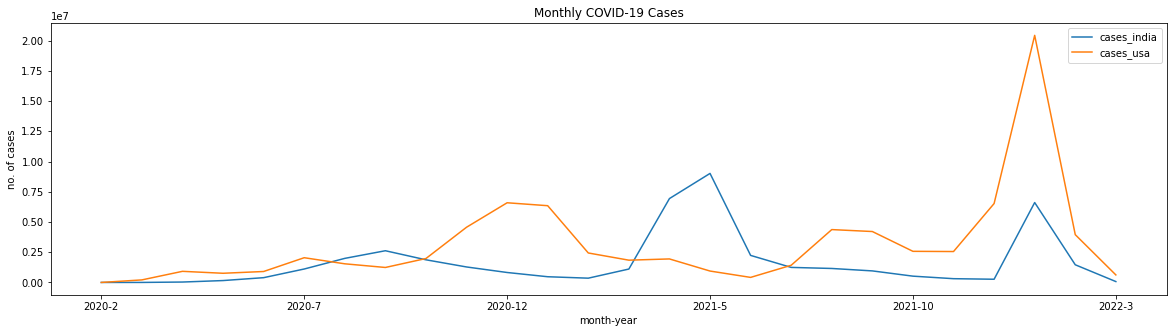

In [ ]:
# plot the dataframe

plot_title = "Monthly COVID-19 Cases"

x = 'month_year'
y = ['cases_india', 'cases_usa']

covid_cases.plot(x, y, figsize=(20,5))
plt.title(plot_title)
plt.xlabel('month-year')
plt.ylabel('no. of cases')


Creating vaccine rollout plot for India and USA

In [ ]:
# importing data

india_col = ['Updated On', 'Total Doses Administered', 'Male (Individuals Vaccinated)', 'Female (Individuals Vaccinated)', 'Transgender (Individuals Vaccinated)']
india_vax = pd.read_csv("/content/drive/MyDrive/PR_finals/cowin_vaccine_data_statewise.csv", usecols = india_col)


usa_col = ['Date', 'Total Doses Administered Daily']
usa_vax = pd.read_csv("/content/drive/MyDrive/PR_finals/trends_in_number_of_covid19_vaccinations_in_the_us.csv", usecols = usa_col)

In [ ]:
india_vax.head()

,Updated On,Total Doses Administered,Male (Individuals Vaccinated),Female (Individuals Vaccinated),Transgender (Individuals Vaccinated)
0,16/01/2021,48276.0,23757.0,24517.0,2.0
1,17/01/2021,58604.0,27348.0,31252.0,4.0
2,18/01/2021,99449.0,41361.0,58083.0,5.0
3,19/01/2021,195525.0,81901.0,113613.0,11.0
4,20/01/2021,251280.0,98111.0,153145.0,24.0


In [ ]:
# create month and year columns
india_vax['month'] = pd.DatetimeIndex(india_vax['Updated On']).month
india_vax['year'] = pd.DatetimeIndex(india_vax['Updated On']).year

usa_vax['month'] = pd.DatetimeIndex(usa_vax['Date']).month
usa_vax['year'] = pd.DatetimeIndex(usa_vax['Date']).year

In [ ]:
india_vax.head()

,Updated On,Total Doses Administered,Male (Individuals Vaccinated),Female (Individuals Vaccinated),Transgender (Individuals Vaccinated),month,year
0,16/01/2021,48276.0,23757.0,24517.0,2.0,1,2021
1,17/01/2021,58604.0,27348.0,31252.0,4.0,1,2021
2,18/01/2021,99449.0,41361.0,58083.0,5.0,1,2021
3,19/01/2021,195525.0,81901.0,113613.0,11.0,1,2021
4,20/01/2021,251280.0,98111.0,153145.0,24.0,1,2021


In [ ]:
# group dataframes by month and year

india_vax_monthwise = india_vax.groupby(['month','year']).sum().reset_index()

usa_vax_monthwise = usa_vax.groupby(['month','year']).sum().reset_index()

In [ ]:
india_vax[(india_vax['month'] == 1) & (india_vax['year'] == 2021)]

,Updated On,Total Doses Administered,Male (Individuals Vaccinated),Female (Individuals Vaccinated),Transgender (Individuals Vaccinated),month,year
0,16/01/2021,48276.0,23757.0,24517.0,2.0,1,2021
1,17/01/2021,58604.0,27348.0,31252.0,4.0,1,2021
2,18/01/2021,99449.0,41361.0,58083.0,5.0,1,2021
3,19/01/2021,195525.0,81901.0,113613.0,11.0,1,2021
4,20/01/2021,251280.0,98111.0,153145.0,24.0,1,2021
...,...,...,...,...,...,...,...
10540,01/06/2021,14969157.0,6194489.0,4879421.0,1484.0,1,2021
10570,01/07/2021,22009840.0,NaN,NaN,NaN,1,2021
10601,01/08/2021,29805755.0,NaN,NaN,NaN,1,2021
10632,01/09/2021,41608366.0,NaN,NaN,NaN,1,2021


In [ ]:
india_vax_monthwise.head()

,month,year,Total Doses Administered,Male (Individuals Vaccinated),Female (Individuals Vaccinated),Transgender (Individuals Vaccinated)
0,1,2021,3.865919e+09,4.024820e+08,3.726244e+08,108286.0
1,2,2021,4.222649e+09,5.551354e+08,5.037422e+08,143577.0
2,3,2021,5.687052e+09,1.209493e+09,1.058344e+09,270630.0
3,4,2021,8.697618e+09,2.515578e+09,2.298128e+09,621472.0
4,5,2021,1.135651e+10,3.469072e+09,3.074867e+09,961420.0


In [ ]:
# combine month and year into index of dataframe

india_vax_monthwise['month_year'] =  india_vax_monthwise['year'].apply(str) + '-' + india_vax_monthwise['month'].apply(str)

usa_vax_monthwise['month_year'] =  usa_vax_monthwise['year'].apply(str) + '-' + usa_vax_monthwise['month'].apply(str)

In [ ]:
# merge the india and usa dataframes into one
monthly_vax = pd.merge(left = india_vax_monthwise, right = usa_vax_monthwise, 
                       how = 'inner', left_on = 'month_year', right_on = 'month_year')

In [ ]:
# drop and rename columns
monthly_vax = monthly_vax.rename(columns = {'Total Doses Administered':'doses_india', 'Total Doses Administered Daily':'doses_usa',})
monthly_vax.drop(['month_y', 'year_y'], axis=1, inplace=True)

In [ ]:
monthly_vax['doses_india'] = (monthly_vax['doses_india']/1000000000).round(2)
monthly_vax['doses_usa'] = (monthly_vax['doses_usa']/1000000000).round(2)

Text(0, 0.5, 'no. of doses in 10^9')

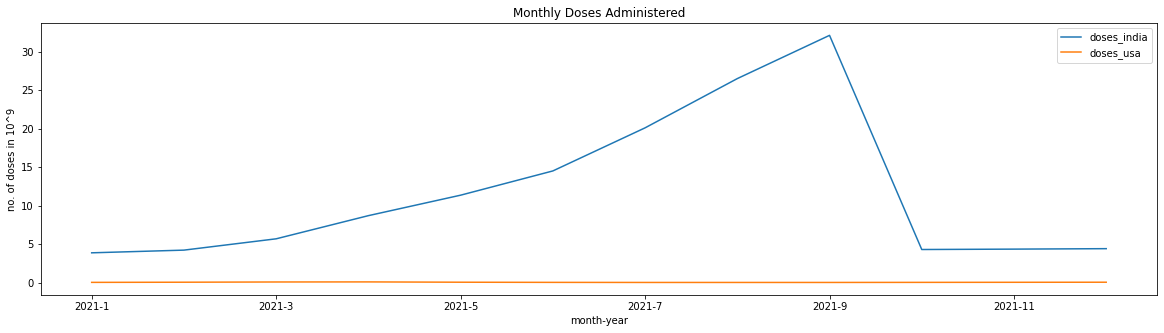

In [ ]:
# plot the dataframe
plot_title = "Monthly Doses Administered"

x = 'month_year'
y = ['doses_india', 'doses_usa']

monthly_vax.plot(x, y, figsize=(20,5))
plt.title(plot_title)
plt.xlabel('month-year')
plt.ylabel('no. of doses in 10^9')



In [ ]:
monthly_vax['Male (Individuals Vaccinated)'] = ((monthly_vax['Male (Individuals Vaccinated)'] - monthly_vax['Male (Individuals Vaccinated)'].min())
                                                /(monthly_vax['Male (Individuals Vaccinated)'].max() - monthly_vax['Male (Individuals Vaccinated)'].min())).round(2)
                                                
monthly_vax['Female (Individuals Vaccinated)'] = ((monthly_vax['Female (Individuals Vaccinated)'] - monthly_vax['Female (Individuals Vaccinated)'].min())
                                                /(monthly_vax['Female (Individuals Vaccinated)'].max() - monthly_vax['Female (Individuals Vaccinated)'].min())).round(2)

monthly_vax['Transgender (Individuals Vaccinated)'] = ((monthly_vax['Transgender (Individuals Vaccinated)'] - monthly_vax['Transgender (Individuals Vaccinated)'].min())
                                                /(monthly_vax['Transgender (Individuals Vaccinated)'].max() - monthly_vax['Transgender (Individuals Vaccinated)'].min())).round(2)


Text(0, 0.5, 'no. of individuals')

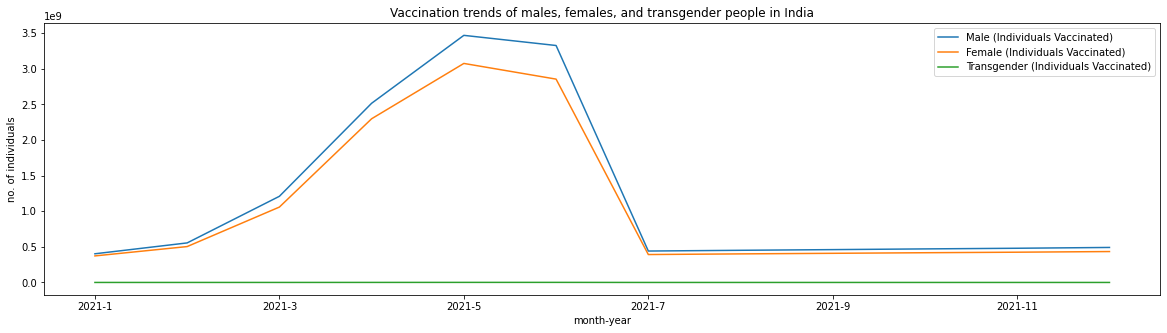

In [ ]:
# plot male/female/trans people vaccine uptake trends in india

plot_title = "Vaccination trends of males, females, and transgender people in India"
x = "month_year"
y = ["Male (Individuals Vaccinated)", "Female (Individuals Vaccinated)", "Transgender (Individuals Vaccinated)"]
#y = "Transgender (Individuals Vaccinated)"

monthly_vax.plot(x, y, figsize=(20,5))
plt.title(plot_title)
plt.xlabel('month-year')
plt.ylabel('no. of individuals')

In [ ]:
monthly_vax.tail()

,month_x,year_x,doses_india,Male (Individuals Vaccinated),Female (Individuals Vaccinated),Transgender (Individuals Vaccinated),month_year,doses_usa
7,8,2021,26.51,451498494.0,401166951.0,123748.0,2021-8,0.02
8,9,2021,32.13,460947708.0,409161373.0,126973.0,2021-9,0.02
9,10,2021,4.30,471042661.0,417397697.0,130433.0,2021-10,0.03
10,11,2021,4.35,480123501.0,424730730.0,133539.0,2021-11,0.04
11,12,2021,4.41,491440115.0,433823957.0,137085.0,2021-12,0.05
